In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Haar Cascade for face detection
face_detector = cv2.CascadeClassifier("../model/haarcascade_frontalface_default.xml")

if face_detector.empty():
    raise IOError("Haar Cascade load failed!")

In [3]:
# Read reference image
img = cv2.imread("../images/face.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the reference image
faces = face_detector.detectMultiScale(gray, 1.1, 5)

# Extract the first detected face as reference
x, y, w, h = faces[0]
ref_face = gray[y:y+h, x:x+w]
ref_face = cv2.resize(ref_face, (200, 200))

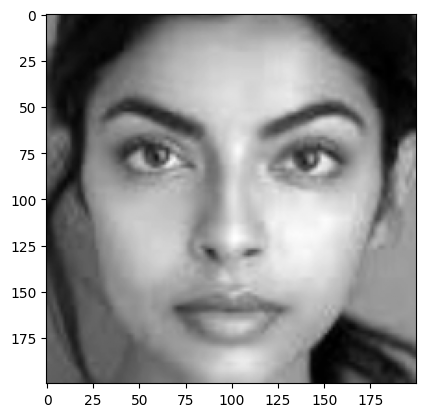

In [4]:
plt.imshow(ref_face, cmap='gray');

In [5]:
# Create LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Label for the reference face (only one person → label 0)
labels = np.array([0], dtype=np.int32)

recognizer.train([ref_face],labels)

In [ ]:
cap = cv2.VideoCapture(0)
while True:
	ret, frame = cap.read()
	if not ret:
		break

	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	faces = face_detector.detectMultiScale(gray, 1.3, 5)

	for (x, y, w, h) in faces:
		face = gray[y:y+h, x:x+w]
		face = cv2.resize(face, (200, 200))
  # Predict face label and confidence
		label, confidence = recognizer.predict(face)
  
  # Lower confidence means better match
	if confidence < 60:
		color = (0, 255, 0) # Green for match
		text = "MATCH"
	else:
		color = (0, 0, 255)  # Red for no match
		text = "NOT MATCH"
  
	cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
	cv2.putText(frame, text, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
	cv2.imshow("Face Recognition", frame)
 
     # Exit when 'q' is pressed
	if cv2.waitKey(1) & 0xFF == ord('q'):
		break

cap.release()
cv2.destroyAllWindows()

plt.imshow(frame[...,::-1],cmap='gray');